In [2]:
import numpy as np 
import cv2 
import matplotlib.pyplot as plt 
%matplotlib inline 

## Face Detection (image)

In [3]:
# for detecting the face 

# read an image 
img = cv2.imread('./Data/FB_IMG.jpg')

# convert into gray scale 
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# apply haar cascade
haar = cv2.CascadeClassifier('./Data/haarcascade_frontalface_default.xml') # read first

face = haar.detectMultiScale(gray,1.3,5)  #scale factor , nearest neighbour 

In [4]:
# one face is detected with coordinates 
print(face)    # x , y then the width and height of the face

[[184  74 165 165]]


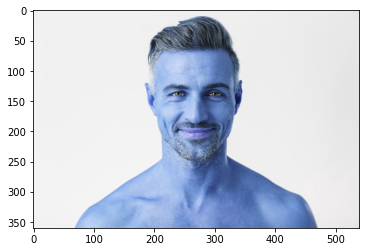

In [5]:
# display the image 
plt.imshow(img)

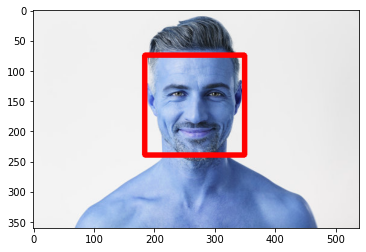

In [6]:
# draw the rectangle boundary box
cv2.rectangle(img,(184,74),(184+165,74+165),(255,0,0),8) # x+wdith , y+height  , color and thinckness
plt.imshow(img)  

In [7]:
# lets pop up our image 
cv2.imshow('object_detect', img)  # window name , matrix
cv2.waitKey(0)   # waiting for any keyboard events 
cv2.destroyAllWindows() # close after keystrokes 

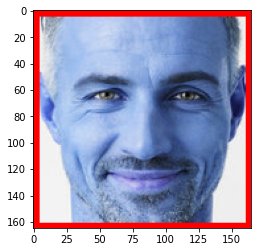

In [24]:
# crop the image
face_crop = img[74:74+165,184:184+165] # rows then cols 
plt.imshow(face_crop)

In [25]:
# save our croped image 
cv2.imwrite('./Data/man.png',face_crop)
# finally we are able to extract the face from the image 

True

## Face Detection (Videos)


In [ ]:
# first load the video 
# unlike static image , videos are combination of images like 24 frames per second

cap = cv2.VideoCapture("./Data/The Avengers - I'm Always Angry - Hulk SMASH Scene - Movie CLIP HD.mp4")

while True :
    ret, frame = cap.read()    # ret returns true ,frame nothing but our single image
    if ret == False :
        break
    cv2.imshow('object_detection', frame)
    #need to control my video every 40 milesconds
    if cv2.waitKey(40) == 24 :#  27 is escapeKey
        break
cv2.destroyAllWindows()
cap.release()

In [28]:
# face detection 

def face_detection(img):
    # frame read from video
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    haar =  cv2.CascadeClassifier('./Data/haarcascade_frontalface_default.xml')
    faces = haar.detectMultiScale(gray , 1.3 , 5) # returns array 
    
    for x,y,w,h in faces :
        #draw the rectangle 
        cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 5)
        
    return img
    
    
cap = cv2.VideoCapture("./Data/Faces in 8k HDR.mp4")

while True :
    #cap.set(cv2.CAP_PROP_FPS,29.97) 
    ret, frame = cap.read()    # ret returns true ,frame nothing but our single image
    #print(cap.get(cv2.CAP_PROP_FPS))
    if ret == False :
        break
        
    #apply face detection on frame
        
    frame = face_detection(frame)    
        
    cv2.imshow('object_detection', frame)
    if cv2.waitKey(20) == 27 :
        break
        
cv2.destroyAllWindows()
cap.release()